In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
import pandas as pd

# Load the dataset
url = "C:\DatabricksCICD\ML\K-MeansClustering\Mall_Customers.csv"
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [14]:
# Selecting relevant features
X = df.iloc[:, [3, 4]].values  

# Standardize the features
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)


c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans 

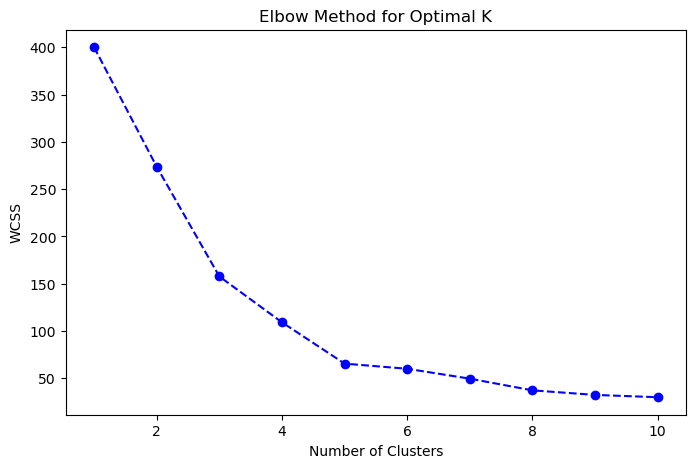

In [15]:
# Finding optimal K using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
# Apply K-Means with optimal K
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)  
y_kmeans = kmeans.fit_predict(X_scaled)

c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


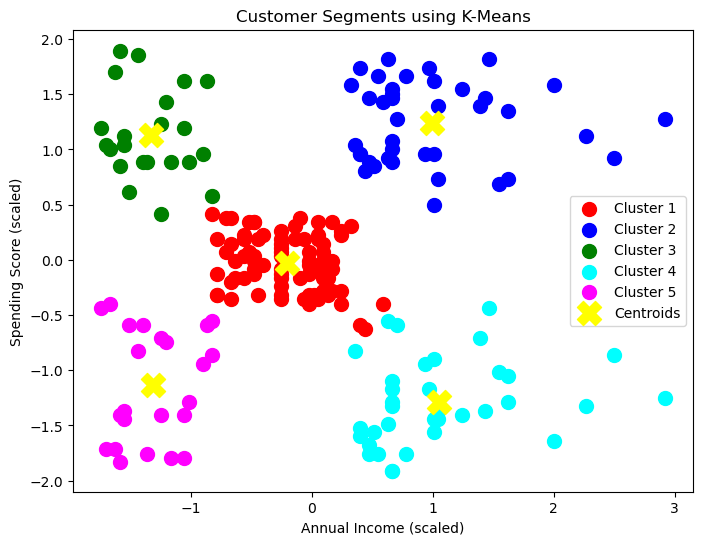

In [17]:
# Visualizing the Clusters
plt.figure(figsize=(8, 6))

# Scatter plot of clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments using K-Means')
plt.legend()
plt.show()

c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans 

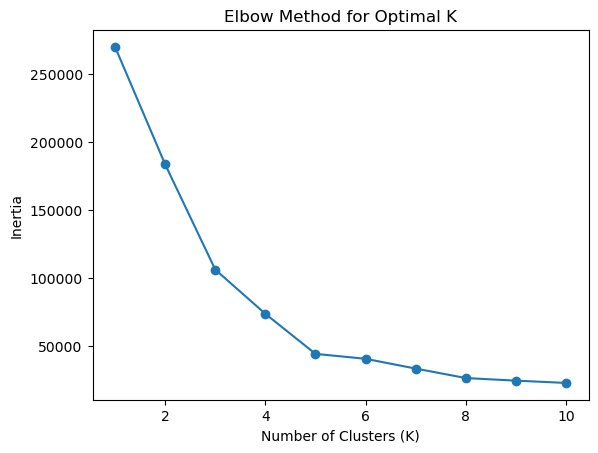

In [18]:
# Calculate inertia for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()